In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import time
#!pip install nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import metrics

### Data Exploration

In [2]:
df=pd.read_csv('train.csv')
df.head(5)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [3]:
df[df['use_case_for_drug']=='Birth Control']

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
5,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,5.691792
20,60156,NuvaRing,Birth Control,"""I was off birth control for a while consideri...",5,18-Apr-13,9,7.282127
41,84639,Ethinyl estradiol / norgestimate,Birth Control,"""I wrote my expirence with this pill before, b...",5,31-Aug-16,4,6.916894
42,98258,Nexplanon,Birth Control,"""I&#039;ve had this implant for 7 months now, ...",4,4-Jun-15,4,8.182756
...,...,...,...,...,...,...,...,...
32148,14980,Ethinyl estradiol / norethindrone,Birth Control,"""I started this BC at 17 and just went off of ...",10,11-Aug-17,2,8.074493
32149,9442,Lo Loestrin Fe,Birth Control,"""Omg I&#039;ve been taking it for less than a ...",3,13-Feb-17,7,6.735530
32153,49137,Ethinyl estradiol / levonorgestrel,Birth Control,"""I&#039;ve been on aleese a month now and it&#...",3,1-Aug-16,4,8.593894
32155,142183,Levonorgestrel,Birth Control,"""There are some bad reviews about Kyleena - so...",10,6-Dec-17,0,6.109307


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32164 entries, 0 to 32163
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32164 non-null  int64  
 1   name_of_drug                32164 non-null  object 
 2   use_case_for_drug           32164 non-null  object 
 3   review_by_patient           32164 non-null  object 
 4   effectiveness_rating        32164 non-null  int64  
 5   drug_approved_by_UIC        32164 non-null  object 
 6   number_of_times_prescribed  32164 non-null  int64  
 7   base_score                  32164 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [5]:
df.isna().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

No null values are present in the data.

In [ ]:
# Diffrent types of drugs used

print(f'Total types of drugs available is {df.name_of_drug.nunique()}.')

df.name_of_drug.value_counts().reset_index()

Total types of drugs available is 2220.


,index,name_of_drug
0,Levonorgestrel,724
1,Etonogestrel,628
2,Ethinyl estradiol / norethindrone,547
3,Ethinyl estradiol / norgestimate,425
4,Nexplanon,397
...,...,...
2215,Ephedrine / guaifenesin,1
2216,Xalkori,1
2217,Methscopolamine,1
2218,Brimonidine / timolol,1


In [ ]:
# Diffrent types of drugs used
print(f'Total types of drugs available is {df.use_case_for_drug.nunique()}.')

df_drug=df.use_case_for_drug.value_counts().reset_index()
df.use_case_for_drug.value_counts().reset_index()

Total types of drugs available is 636.


,index,use_case_for_drug
0,Birth Control,5795
1,Depression,1791
2,Pain,1273
3,Anxiety,1174
4,Acne,1101
...,...,...
631,amilial Mediterranean Feve,1
632,Pre-Exposure Prophylaxis,1
633,Oligospermia,1
634,"Mycobacterium avium-intracellulare, Treatment",1


### Data wrangling

<AxesSubplot:>

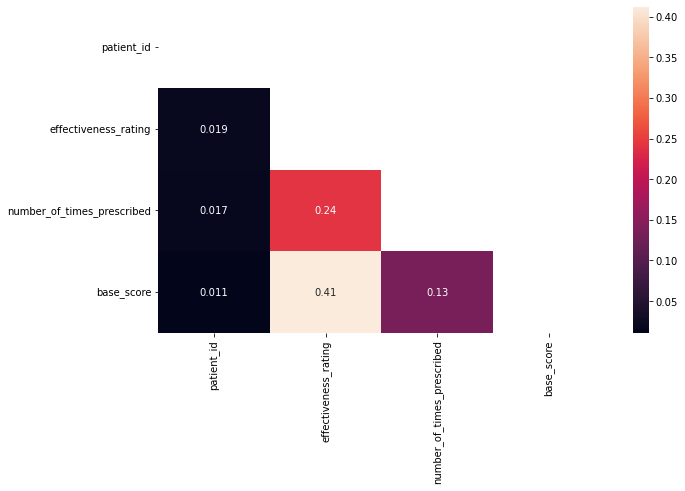

In [8]:
# Dataset is copied to perform wrangaling operations.

df1=df.copy(deep=True)
corr1=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr1,annot=True,mask=np.triu(np.ones_like(corr1)))

In [9]:
df1['drug_day']=df1['drug_approved_by_UIC'].str.split('-').str[0]
df1['drug_month']=df1['drug_approved_by_UIC'].str.split('-').str[1]
df1['drug_year']=df1['drug_approved_by_UIC'].str.split('-').str[2]
df1.drug_month=df1.drug_month.map({"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12})


In [10]:
df1['drug_day']=df1.drug_day.astype('int64')
df1['drug_month']=df1.drug_month.astype('int64')
df1['drug_year']=df1.drug_year.astype('int64')

corr=df1.corr()

<AxesSubplot:>

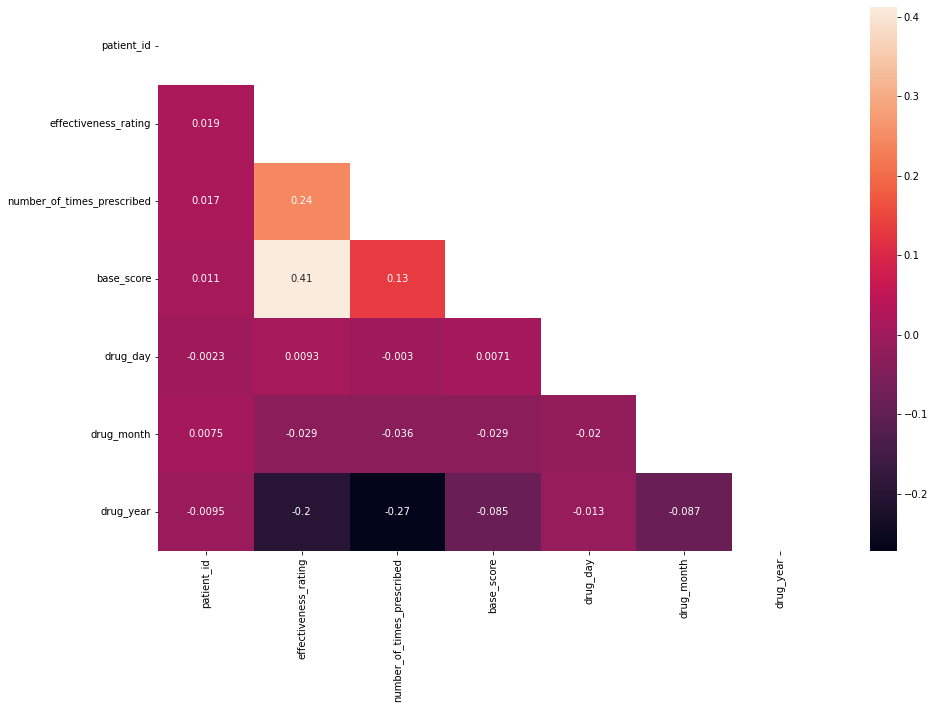

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,mask=np.triu(np.ones_like(corr)))

Correlation of base_score and drug_approved_by_UIC is approximately equal to 0, therefore we can drop the "drug_approved_by_UIC" column.
The columns patient_id can also be dropped.

In [12]:
df1.drop(['drug_approved_by_UIC','drug_day','drug_month','drug_year','patient_id'],axis=1,inplace=True)
df1.head(2)

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,number_of_times_prescribed,base_score
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,8.022969
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,7.858458


In [13]:
def toLowerandTrim(text):
    text=text.lower()
    text=text.strip()
    return text

In [14]:
df1['name_of_drug']=df1.name_of_drug.apply(toLowerandTrim)
df1['use_case_for_drug']=df1['use_case_for_drug'].apply(toLowerandTrim)
df1.head(5)

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,number_of_times_prescribed,base_score
0,valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combinati...",9,27,8.022969
1,guanfacine,adhd,"""My son is halfway through his fourth week of ...",8,192,7.858458
2,lybrel,birth control,"""I used to take another oral contraceptive, wh...",5,17,6.341969
3,buprenorphine / naloxone,opiate dependence,"""Suboxone has completely turned my life around...",9,37,6.590176
4,cialis,benign prostatic hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,43,6.144782


### Predecting on non-NLP Models -Dropping the reviews column and predecting the base_score

In [4]:
df2=df.copy(deep=True)

In [5]:
df2.drop(['patient_id','review_by_patient','drug_approved_by_UIC'],axis=1,inplace=True)

In [6]:
df2.head(2)

,name_of_drug,use_case_for_drug,effectiveness_rating,number_of_times_prescribed,base_score
0,Valsartan,Left Ventricular Dysfunction,9,27,8.022969
1,Guanfacine,ADHD,8,192,7.858458


In [7]:
# Seprating the data.
X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=X.apply(le.fit_transform)
X.head(2)

,name_of_drug,use_case_for_drug,effectiveness_rating,number_of_times_prescribed
0,2072,335,8,27
1,923,39,7,192


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [10]:
X_test.shape,y_train.shape, X_train.shape, y_test.shape

((10615, 4), (21549,), (21549, 4), (10615,))

###### Predection using different regression algorithms on not an NLP model

In [11]:
# Predection using LinearRegression, Ridge, Lasso, Desc, DecisionTreeRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor # K-NN ALgorithm

In [12]:

def run_model(model,X_train,y_train,X_test,y_test):
  output={}
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  r2=metrics.r2_score(y_test,y_pred)
  Adjr2= 1 - (1-metrics.r2_score(y_test, y_pred)) *(len(y)-1)/(len(y)-X.shape[1]-1)
  output[model]={'R-Squared':r2,'Adjusted R2':Adjr2}
  return output

###### Logistic Regression

In [13]:
# Logistic Regression
LR=LinearRegression()
print(run_model(LR,X_train,y_train,X_test,y_test))



{LinearRegression(): {'R-Squared': 0.1667906924412197, 'Adjusted R2': 0.1666870562202477}}


###### Ridge Regression

In [14]:
# Ridge Regression
alpha=[1,10]
for i in alpha:
  ridge=Ridge(i)
  print(run_model(ridge,X_train,y_train,X_test,y_test))

{Ridge(alpha=1): {'R-Squared': 0.16679072363988756, 'Adjusted R2': 0.16668708742279625}}
{Ridge(alpha=10): {'R-Squared': 0.1667910041126044, 'Adjusted R2': 0.16668736793039884}}


###### GradientBoostingRegressor

In [15]:
# GradientBoostingRegressor
GBR=GradientBoostingRegressor()
print(run_model(GBR,X_train,y_train,X_test,y_test))

{GradientBoostingRegressor(): {'R-Squared': 0.8804187450879799, 'Adjusted R2': 0.8804038713350757}}


###### DecisionTreeRegressor

In [16]:
# DecisionTreeRegressor
DTR=DecisionTreeRegressor()
print(run_model(DTR,X_train,y_train,X_test,y_test))

{DecisionTreeRegressor(): {'R-Squared': 0.9578741413365196, 'Adjusted R2': 0.957868901638934}}


###### RandomForestRegressor

In [17]:
# RandomForestRegressor
for i in range(50,500,100):
  RFR = RandomForestRegressor(n_estimators=i)
  print(run_model(RFR,X_train,y_train,X_test,y_test))

{RandomForestRegressor(n_estimators=50): {'R-Squared': 0.9742943463321782, 'Adjusted R2': 0.9742911490121535}}
{RandomForestRegressor(n_estimators=150): {'R-Squared': 0.9743735896529357, 'Adjusted R2': 0.974370402189352}}
{RandomForestRegressor(n_estimators=250): {'R-Squared': 0.9747874799639211, 'Adjusted R2': 0.9747843439808326}}
{RandomForestRegressor(n_estimators=350): {'R-Squared': 0.974565942000266, 'Adjusted R2': 0.9745627784618476}}
{RandomForestRegressor(n_estimators=450): {'R-Squared': 0.9745590328328254, 'Adjusted R2': 0.9745558684350311}}


###### KN neighbours Regressor

In [19]:
# KN neighbours Regressor
for n in range(1,51,5):
  KNN=KNeighborsRegressor(n_neighbors=n)
  print(run_model(KNN,X_train,y_train,X_test,y_test))

{KNeighborsRegressor(n_neighbors=1): {'R-Squared': -0.21558019400038142, 'Adjusted R2': -0.2157313902681759}}
{KNeighborsRegressor(n_neighbors=6): {'R-Squared': 0.11702148401074042, 'Adjusted R2': 0.11691165739722764}}
{KNeighborsRegressor(n_neighbors=11): {'R-Squared': 0.11851103354250991, 'Adjusted R2': 0.11840139220211277}}
{KNeighborsRegressor(n_neighbors=16): {'R-Squared': 0.11330266592118621, 'Adjusted R2': 0.11319237675372706}}
{KNeighborsRegressor(n_neighbors=21): {'R-Squared': 0.10633859822075431, 'Adjusted R2': 0.10622744284878638}}
{KNeighborsRegressor(n_neighbors=26): {'R-Squared': 0.10341900166685547, 'Adjusted R2': 0.10330748314969596}}
{KNeighborsRegressor(n_neighbors=31): {'R-Squared': 0.09641364446642553, 'Adjusted R2': 0.09630125460908756}}
{KNeighborsRegressor(n_neighbors=36): {'R-Squared': 0.09299752785698656, 'Adjusted R2': 0.09288471309631086}}
{KNeighborsRegressor(n_neighbors=41): {'R-Squared': 0.08836041784435522, 'Adjusted R2': 0.0882470263107683}}
{KNeighborsR

In [25]:

import xgboost as xg

In [26]:
XGR=xg.XGBRegressor()
print(run_model(XGR,X_train,y_train,X_test,y_test))

{XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...): {'R-Squared': 0.9951950956840576, 'Adjusted R2': 0.9951944980405593}}


### Dealing with 'review_by_patient' column , applying regex to remove the punctuations, extra chars and stop words.

This is to check if applying stemming to the dataset will help us in data exploraion or not.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus.reader import reviews
count=0
ps=PorterStemmer()
def removePunctuationsAndStopWordsAndStem(review):
    global count
    n=0
    review=re.sub(r'[^\w\s]',"",review)
    review=nltk.word_tokenize(review)
    
    review=[ps.stem(word)for word in review if word not in stopwords.words('english')]
    n=len(review)
    if n>count:
      count=n
    return review

In [ ]:
CORPUS=[]
for i in range(0,len(df1)):
  CORPUS.append(" ".join(removePunctuationsAndStopWordsAndStem(df1.review_by_patient[i])))

print(len(CORPUS))

32164


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf=TfidfTransformer()
TF_Data=tf.fit_transform(CORPUS)


In [ ]:

VOC_SIZE=5000
MAX_LEN=0
REVIEWS=[]
st=time.time()
def oneHotEncoding(review):
  global REVIEWS
  global MAX_LEN
  review=re.sub(r'[^\w\s]',"",review)
  review=review.lower()
  review=review.split()
  review=[word for word in review if word not in set(stopwords.words('english'))]
  n=len(review)
  if n>MAX_LEN:
      MAX_LEN=n
  REVIEWS.append(' '.join(review))

et=time.time()

In [ ]:
sem=df1.review_by_patient.apply(oneHotEncoding)
print(f'time taken : {str(et-st)}')

353
time taken : 0.00013589859008789062


In [ ]:
oneHot_Repr=[one_hot(words,VOC_SIZE) for words in REVIEWS]
padded_sent=pad_sequences(oneHot_Repr,padding='post',maxlen=MAX_LEN+1)
#print(padded_sent.shape)

array([   0,    1,    2, ..., 4997, 4998, 4999], dtype=int32)

###### Normalization of training and testing data.

In [ ]:
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense
import tensorflow.keras as K
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Flatten
#!pip install keras-tuner
#from keras_tuner import 

In [ ]:
# Adding Inputs 
i#np_cat_data = keras.layers.Input(shape=unique_values,)
#inp_num_data = keras.layers.Input(shape=(x_train_scaled.shape[1],))
#emb = keras.layers.Embedding(input_dim=unique_values, output_dim=unique_values.shape[1]/2)(inp_cat_data) 


IndexError: ignored

# Predection on test.csv to predict the base score

In [ ]:
test=pd.read_csv('test.csv')
test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [ ]:
df_patientID=test.patient_id

In [ ]:
#cleaning the data, removing patient_id,review_by_patient,drug_approved_by_UIC

test.drop(['review_by_patient','patient_id','drug_approved_by_UIC'],axis=1,inplace=True)
test.head(2)

,name_of_drug,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,Mirtazapine,22,Depression,10
1,Contrave,35,Weight Loss,9


In [ ]:
# Converting the name_of_drug to lowercase and trimming
test['name_of_drug']=test.name_of_drug.apply(toLowerandTrim)
test['use_case_for_drug']=test['use_case_for_drug'].apply(toLowerandTrim)
test.head(5)


,name_of_drug,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,mirtazapine,22,depression,10
1,contrave,35,weight loss,9
2,zyclara,13,keratosis,4
3,methadone,21,opiate withdrawal,7
4,ambien,44,insomnia,2


In [ ]:
test=test.iloc[:,[0,3,1,2]]
test

,name_of_drug,use_case_for_drug,effectiveness_rating,number_of_times_prescribed
0,mirtazapine,depression,10,22
1,contrave,weight loss,9,35
2,zyclara,keratosis,4,13
3,methadone,opiate withdrawal,7,21
4,ambien,insomnia,2,44
...,...,...,...,...
10755,chantix,smoking cessation,1,2
10756,armodafinil,narcolepsy,1,18
10757,tamoxifen,"breast cancer, prevention",10,43
10758,levonorgestrel,birth control,8,7


In [ ]:
test=test.apply(le.fit_transform)
test

,name_of_drug,use_case_for_drug,effectiveness_rating,number_of_times_prescribed
0,856,133,9,22
1,311,457,8,35
2,1474,249,3,13
3,823,315,6,21
4,66,239,1,44
...,...,...,...,...
10755,253,408,0,2
10756,106,291,0,18
10757,1258,90,9,43
10758,728,80,7,7


In [ ]:
#Using the same trained model to predict the output of test.csv
RFR_2 = RandomForestRegressor(n_estimators=100)
RFR_2.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_RFR=RFR_2.predict(test)

In [ ]:
submit=pd.DataFrame({'patiend_id':df_patientID,'base_score':y_pred_RFR.round(2)},columns=['patiend_id','base_score'])

submit.to_csv('submission.csv',index=False)

In [ ]:
submit

,patiend_id,base_score
0,163740,8.76
1,39293,8.75
2,208087,5.95
3,23295,5.99
4,97013,6.13
...,...,...
10755,151266,6.17
10756,139347,4.03
10757,159999,6.79
10758,130945,5.31


# Conclusion

As we have explored the data and built multiple models for the to predict the base.

Three models such as DecisionTreeRegressor, RandomForestRegrssor gives r2 values upto 97%.